<a href="https://colab.research.google.com/github/asepmuhidin/research/blob/master/Pendahuluan_NLP%2C_Text_Mining%2C_%26_Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing (NLP) - Pemrosesan Bahasa Alami (PBA):
"Sebuah cabang ilmu (AI/Computational Linguistik) yang mempelajari bagaimana bahasa (alami) manusia (terucap/tertulis) dapat dipahami dengan baik oleh komputer dan komputer dapat merespon dengan cara yang serupa ke manusia".

# Aplikasi Umum NLP:
*   Speech Recognition dan Classification
*   Machine Translation (Misal https://translate.google.com/ )
*   Information Retrieval (IR) (misal www.google.com, bing, elasticsearch, etc.) 
*   Man-Machine Interface (misal Chatbot, Siri, cortana, atau Alexa)
*   Sentiment Analysis



# Apakah Perbedaan antara NLP dan Text Mining (TM)?
TM (terkadang disebut Text Analytics) adalah sebuah pemrosesan teks (biasanya dalam skala besar) untuk menghasilkan (generate) informasi atau insights. Untuk menghasilkan informasi TM menggunakan beberapa metode, termasuk NLP. TM mengolah teks secara eksplisit, sementara NLP mencoba mencari makna latent (tersembunyi) lewat aturan bahasa (e.g. grammar/idioms/Semantics).

Contoh aplikasi TM : Social Media Analytics (SMA), Insights from customer's review, Sentiment Analysis, Topic Modelling, dsb.

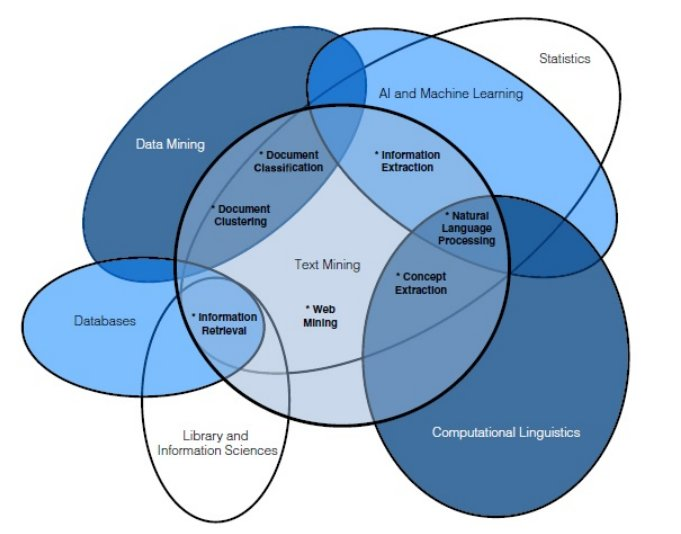

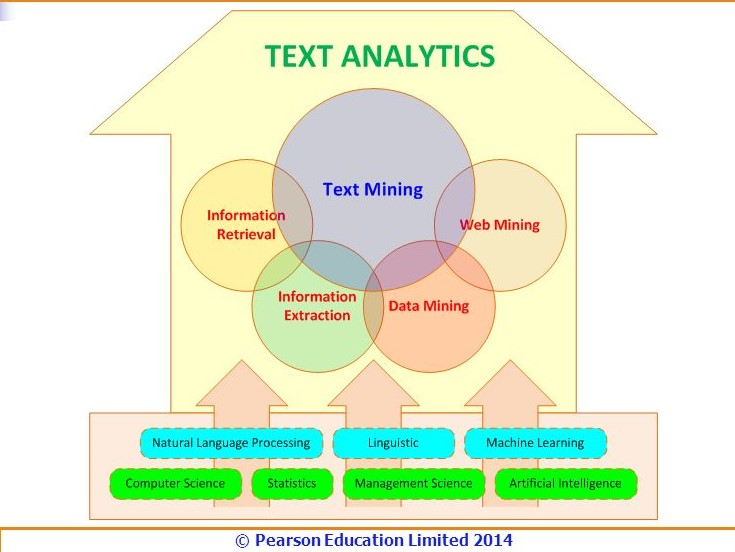

In [ ]:
"""
Installing Modules & getting the necessary files for "Google Colab"
Jika dijalankan di komputer lokal (PC/Laptop) silahkan unduh secara manual dan 
lakukan instalasi module di terminal/command prompt 
"""
import nltk

!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/corpus_sederhana.txt
!wget -P / https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/lib/taudataNlpTm.py
!pip install unidecode textblob sastrawi
nltk.download('popular')

# Review Tipe Variabel di Python

In [44]:
a = 2.3 # Floating Point (tidak sama dengan bilangan Real)
b = 3.0   # Integer
c = True # T/F Boolean
d = 'python' # String
e = [a,b,c,d] # List
f = (a,b,c,d) # Tuple
g = set([a,b,c,d]) # Set
h = {'a':1, 'b':2, 7:'abc'} # Dictionary : keys, values, items

In [49]:
f[2]


True

In [51]:
# Sehingga kita bisa melakukan preprocessing dasar dengan string manipulation seperti berikut:
S = 'cob762a@gmail '
print(S)
print(S.strip()) #menghilangkan spasi opt: lstrip, rstrip
print(S.replace('o','i').replace('a','i'))
print(S.isalnum())
print(S.strip().isalnum())

cob762a@gmail 
cob762a@gmail
cib762i@gmiil 
False
False


In [ ]:
print(dir(S))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [55]:
X = '842'
X.isdigit() 

True

In [53]:
help(X.isdigit)

Help on built-in function isdigit:

isdigit() method of builtins.str instance
    Return True if the string is a digit string, False otherwise.
    
    A string is a digit string if all characters in the string are digits and there
    is at least one character in the string.



In [56]:
help(S.isalnum)

Help on built-in function isalnum:

isalnum() method of builtins.str instance
    Return True if the string is an alpha-numeric string, False otherwise.
    
    A string is alpha-numeric if all characters in the string are alpha-numeric and
    there is at least one character in the string.



In [ ]:
# String adalah Tuple, sehingga
S1 = 'apa '
S2 = 'kabar'
S1+S2

'apa kabar'

In [62]:
names=['ade','maldini','irfan','andrea']
names[:]

['ade', 'maldini', 'irfan', 'andrea']

In [66]:
# String adalah Tuple sehingga bisa di akses seperti List
S = 'NLP dan TextMining di Python'
print('7 character pertama: ', S[:7])
print('7 character terakhir: ', S[-7:])
print( S[8:18])

7 character pertama:  NLP dan
7 character terakhir:   Python
TextMining


In [67]:
# Tapi hati-hati karena ia tuple maka:
try:
    S[5] = 'o'
except:
    print('Error, tuple tidak bisa dirubah nilainya (inplace)')

Error, tuple tidak bisa dirubah nilainya (inplace)


# Text Level Normalization: StopWords
Di Text Mining kata-kata yang sering muncul (dan jarang sekali muncul) memiliki sedikit sekali informasi (signifikansi) terhadap model (machine learning) yang digunakan. Hal ini di karenakan kata-kata tersebut muncul di semua kategori (di permasalahan klasifikasi) atau di semua cluster (di permasalahan pengelompokan/clustering). Kata-kata yang sering muncul ini biasa disebut "StopWords". Stopwords berbeda-beda bergantung dari Bahasa dan Environment (aplikasi)-nya.

**Contoh:**
*   Stopwords bahasa Inggris: am, is, are, do, the, of, etc.
*   Stopwords bahasa Indonesia: adalah, dengan, yang, di, ke, dsb
*   Stopwords twitter: RT, ..

In [68]:
# Loading Stopwords: Ada beberapa cara
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()

NLTK_StopWords = stopwords.words('english')
Sastrawi_StopWords_id = factory.get_stop_words()



In [ ]:
Sastrawi_StopWords_id

In [71]:

df=open('data/stopwords_en.txt',"r",encoding="utf-8", errors='replace')
en_stop = df.readlines()
df.close()
en_stop = [t.strip().lower() for t in en_stop]

df=open('data/stopwords_id.txt',"r",encoding="utf-8", errors='replace')
id_stop = df.readlines()
df.close()
id_stop = [t.strip().lower() for t in id_stop]

N = 10
print(NLTK_StopWords[:N])
print(Sastrawi_StopWords_id[:N])
print(en_stop[:N])
print(id_stop[:N])
print(len(Sastrawi_StopWords_id), len(id_stop), len(NLTK_StopWords), len(en_stop))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua']
['&gt', '&lt', '&nbsp', 'a', 'able', 'about', 'above', 'abst', 'accordance', 'according']
['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir']
126 758 179 2659


In [72]:
# Tipe variabel memiliki aplikasi optimal yang berbeda-beda, misal
L = list(range(10**7))
S = set(range(10**7)) # selain unik dan tidak memiliki keterurutan, set memiliki fungsi lain.

In [73]:
%%timeit
99000000 in L

128 ms ± 37.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [74]:
%%timeit
99000000 in S

35.7 ns ± 0.633 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [81]:
# Tips: selalu rubah list stopwords ke bentuk set, karena di Python jauh lebih cepat untuk cek existence di set ketimbang list
NLTK_StopWords = set(NLTK_StopWords)
Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)
en_stop = set(en_stop)
id_stop = set(id_stop)

In [78]:
'anu' in id_stop 

False

In [77]:
# Cara menggunakan stopwords
from textblob import TextBlob

T = "I am doing NLP at tau-data Indonesia,... \
    adapun saya anu sedang belajar NLP di tau-data Indonesia"
T = T.lower()
T

'i am doing nlp at tau-data indonesia,...     adapun saya anu sedang belajar nlp di tau-data indonesia'

In [82]:
id_stop.add('anu')


In [83]:
'anu' in id_stop 

True

In [84]:
Tokens = TextBlob(T).words # Tokenisasi 
Tokens

WordList(['i', 'am', 'doing', 'nlp', 'at', 'tau-data', 'indonesia', 'adapun', 'saya', 'anu', 'sedang', 'belajar', 'nlp', 'di', 'tau-data', 'indonesia'])

In [85]:
T2 = [t for t in Tokens if t not in id_stop] # Sastrawi_StopWords_id Personal_StopWords_en Personal_StopWords_id
T2

['i',
 'am',
 'doing',
 'nlp',
 'at',
 'tau-data',
 'indonesia',
 'belajar',
 'nlp',
 'tau-data',
 'indonesia']

In [86]:
T2 = [t for t in T2 if t not in en_stop] # Sastrawi_StopWords_id Personal_StopWords_en Personal_StopWords_id
print(' '.join(T2))
# Catatan: Selalu lakukan Stopword filtering setelah tokenisasi (dan normalisasi).

nlp tau-data indonesia belajar nlp tau-data indonesia


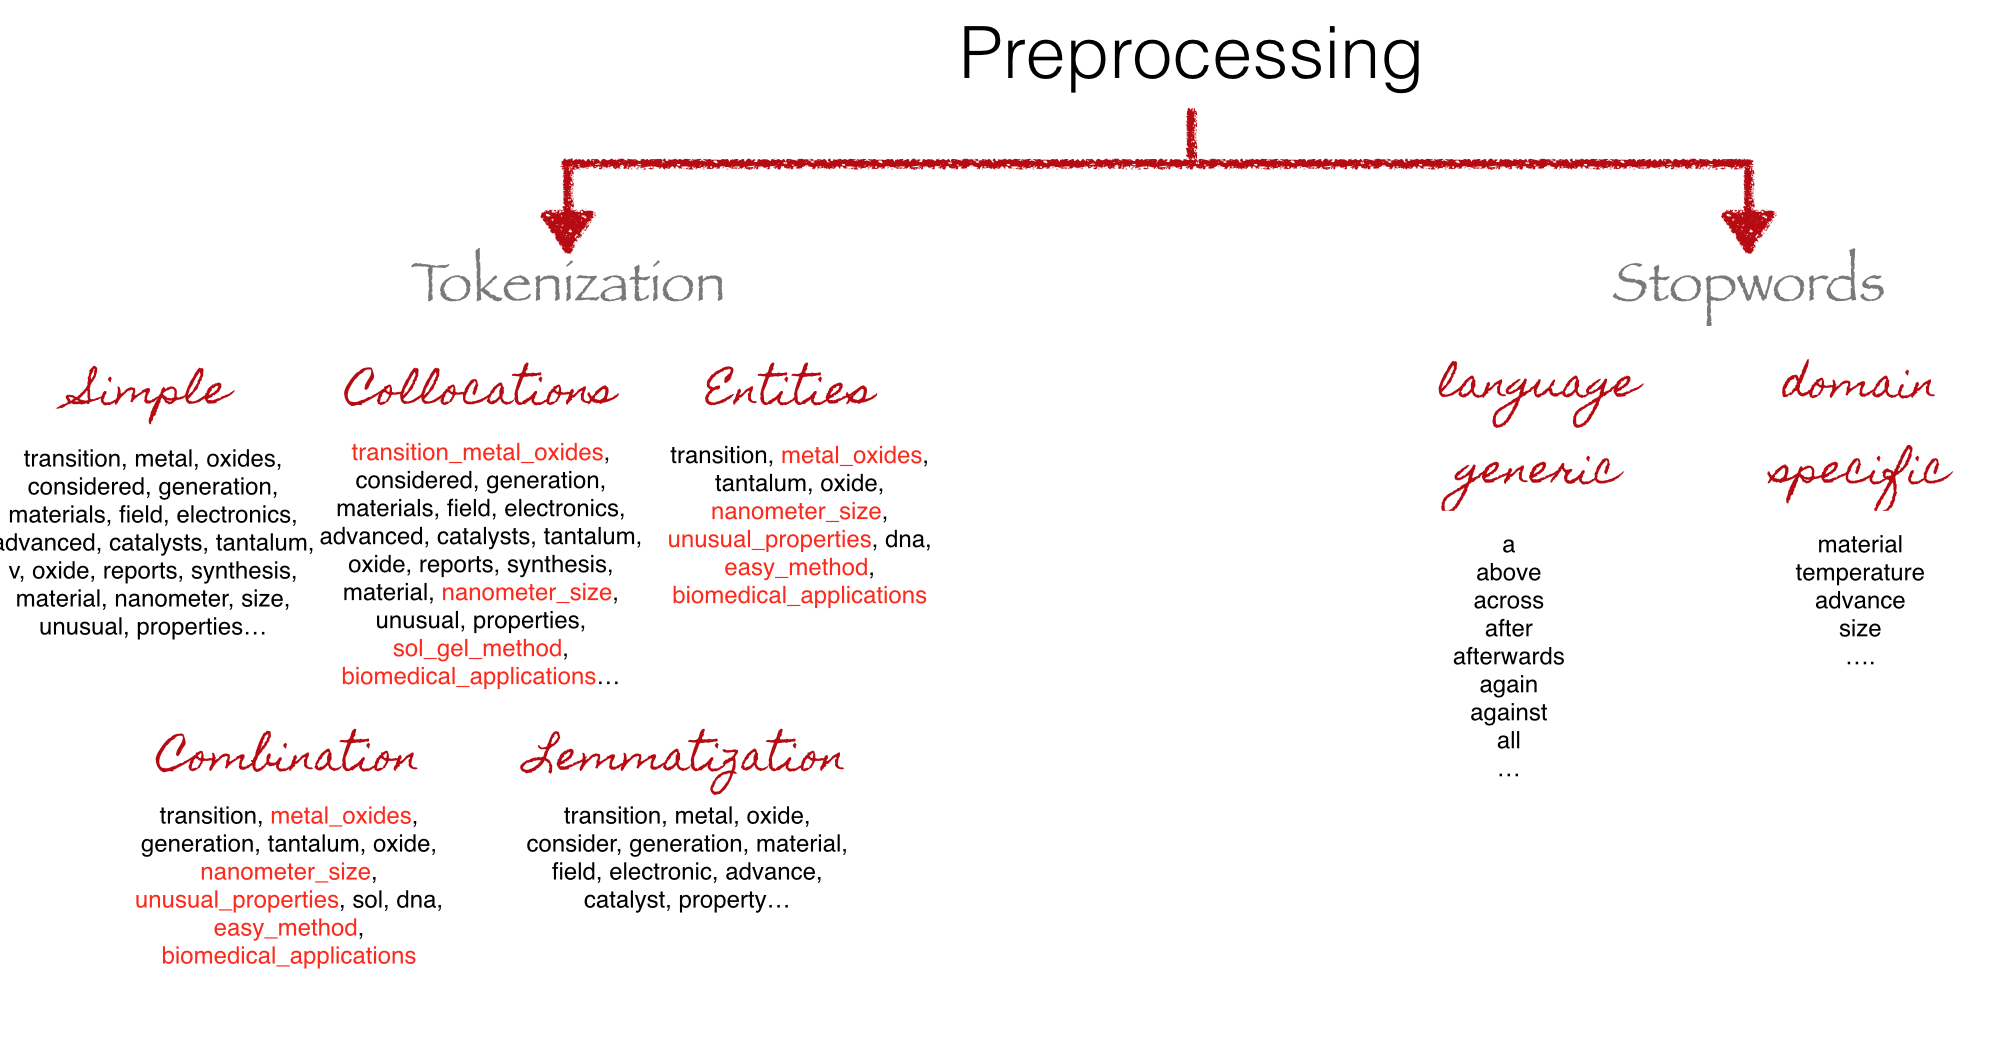

# Menangani Slang atau Singkatan di Data Teks

In [ ]:
# Sebuah contoh sederhana 
T = 'jangan ragu gan, langsung saja di order pajangannya.'
# Misal kita hendak mengganti setiap singkatan (slang) dengan bentuk penuhnya. 
# Dalam hal ini kita hendak mengganti 'gan' dengan 'juragan'
H = T.replace('gan','juragan')
print(H)
# Kita tidak bisa melakukan ini

janjuragan ragu juragan, langsung saja di order pajanjuragannya.


In [ ]:
# dengan tokenisasi
slangs = {'gan':'juragan', 'yg':'yang', 'dgn':'dengan'} #dictionary sederhana berisi daftar singkatan dan kepanjangannya

T = 'jangan ragu gan, langsung saja di order pajangan yg diatas.'
T = TextBlob(T).words
T

WordList(['jangan', 'ragu', 'gan', 'langsung', 'saja', 'di', 'order', 'pajangan', 'yg', 'diatas'])

In [ ]:
for i,t in enumerate(T):
    if t in slangs.keys():
        T[i] = slangs[t]
print(' '.join(T))

jangan ragu juragan langsung saja di order pajangan yang diatas


In [ ]:
# Loading Slang dan Singkatan dari File
# Contoh memuat word fix melalui import file. 
df=open('data/slang.txt',"r",encoding="utf-8", errors='replace')
slangS = df.readlines(); df.close()
slangS[:5] 

['& : dan\n',
 '1pun : satupun\n',
 '7an : tujuan\n',
 '@ : di\n',
 'Dr : dokter\n']

In [ ]:
print(slangs)

{'gan': 'juragan', 'yg': 'yang', 'dgn': 'dengan'}


In [ ]:
slangS = [t.strip('\n').strip() for t in slangS]
print(slangS[:5])

['& : dan', '1pun : satupun', '7an : tujuan', '@ : di', 'Dr : dokter']


In [ ]:
A = 'luv:love'
B = A.split(':')
B

['luv', 'love']

In [ ]:
# pisahkan berdasarkan ':'
slangS = [t.split(":") for t in slangS]
slangS = [[k.strip(), v.strip()] for k,v in slangS]
print(slangS[:3])
slangS = {k:v for k,v in slangS}
print(slangS['7an'])

[['&', 'dan'], ['1pun', 'satupun'], ['7an', 'tujuan']]
tujuan


In [ ]:
print(slangS)

{'&': 'dan', '1pun': 'satupun', '7an': 'tujuan', '@': 'di', 'Dr': 'dokter', 'Jkt': 'Jakarta', 'Jkw': 'jokowi', 'Napza': 'narkoba psikotropika dan zat adiktif', 'Nasihat': 'nasehat', 'SE': 'Surat Edaran', 'ababil': 'abg labil', 'abis': 'habis', 'acc': 'accord', 'accord': 'sesuai', 'ad': 'ada', 'adl': 'adalah', 'adlah': 'adalah', 'adlh': 'adalah', 'administ': 'administrasi', 'adoh': 'aduh', 'afaik': 'as far as i know', 'agma': 'agama', 'aha': 'tertawa', 'ahaha': 'haha', 'ahiok': 'ahok', 'ahoax': 'ahok', 'ahokncc': 'ahok', 'aing': 'saya', 'aj': 'saja', 'aja': 'saja', 'ajak2': 'ajak-ajak', 'ajep-ajep': 'dunia gemerlap', 'ajj': 'saja', 'ak': 'aku', 'aka': 'dikenal juga sebagai', 'akherat': 'akhirat', 'akhirx': 'akhirnya', 'akika': 'aku', 'akko': 'aku', 'akkoh': 'aku', 'akku': 'aku', 'akn': 'akan', 'aktifis2': 'aktivis-aktivis', 'aktivi': 'aktivis', 'aktivis2': 'aktivis-aktivis', 'akun2': 'akun-akun', 'akuwh': 'aku', 'akyu': 'aku', 'alay': 'norak', 'aleg': 'caleg', 'alih2': 'alih-alih', 'alj

In [ ]:
# Test it!
tweet = 'I luv u say. serius gan!, tapi ndak tau kalau sesok.'
T = TextBlob(tweet).words

for i,t in enumerate(T):
    if t in slangS.keys():
        T[i] = slangS[t]
        
print(' '.join(T))

I love untuk sayang serius juragan tapi tidak tahu kalau besok


# Spell Check

**Tujuan Spellcheck:**
*   Cleaning Data
*   Word suggestions
*   OCR/hand writing (Image) recognition
*   Speech Recognition
*   Machine Translation

In [ ]:
# aplikasi spell check di textBlob
from textblob import Word

w = Word('industri')
w.spellcheck()

[('industry', 1.0)]

In [ ]:
w = Word('jang4n')
w.spellcheck()
# Kendalanya kalau Bahasa Indonesia ==> perlu pendekatan umum

[('jang4n', 0.0)]

# Norvig Spell Checker: Menggunakan Aturan Probabilitas Bayes 


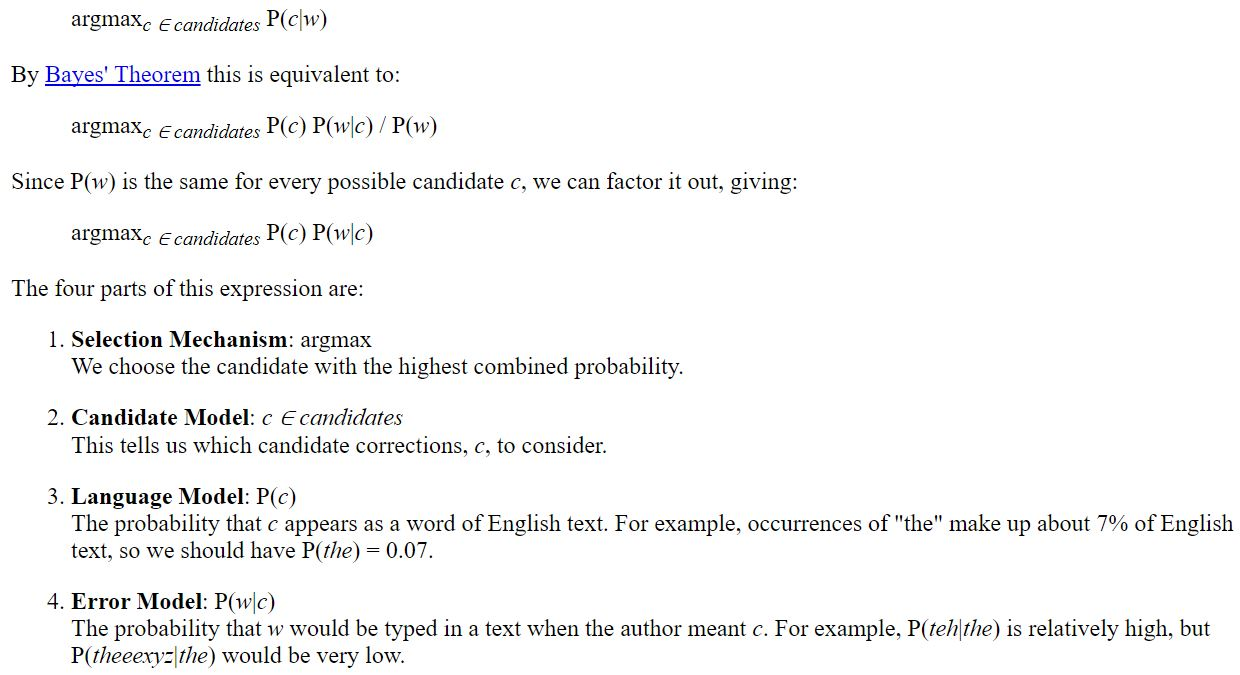

In [ ]:
import taudataNlpTm as tau
# http://norvig.com/spell-correct.html
# corpus = 'data/kata_dasar.txt'
print(tau.correction('jang4n'))

jangan


In [ ]:
kombinasi = tau.edits1('benul')
print(list(kombinasi))

['bcnul', 'bfenul', 'betnul', 'beoul', 'aenul', 'uenul', 'bennl', 'pbenul', 'benult', 'benulk', 'xbenul', 'bynul', 'benut', 'bznul', 'beanul', 'benuli', 'bevul', 'benub', 'beqnul', 'bemul', 'bentul', 'benupl', 'benutl', 'benulw', 'blnul', 'benbl', 'tbenul', 'bdenul', 'benuul', 'beyul', 'benukl', 'besnul', 'beinul', 'bensul', 'benuol', 'beaul', 'penul', 'enul', 'beful', 'benpl', 'benud', 'beniul', 'benyul', 'bjnul', 'benvul', 'benwl', 'bpnul', 'benil', 'benulg', 'benqul', 'benlu', 'benlul', 'benuhl', 'oenul', 'benufl', 'nbenul', 'abenul', 'benuy', 'henul', 'benui', 'berul', 'lbenul', 'beknul', 'xenul', 'benulj', 'bebnul', 'benu', 'begnul', 'benuel', 'senul', 'hbenul', 'beynul', 'befnul', 'benuc', 'beiul', 'boenul', 'jbenul', 'bexnul', 'benulx', 'bbnul', 'bentl', 'benuk', 'benulp', 'bexul', 'benulv', 'benum', 'benjl', 'benxl', 'sbenul', 'benusl', 'behul', 'bengl', 'benulf', 'byenul', 'betul', 'bedul', 'benzl', 'bgnul', 'benuzl', 'bunul', 'blenul', 'benuf', 'benwul', 'fbenul', 'benulu', '

In [ ]:
tau.known(tau.edits1('benul'))

{'bendul', 'bengul', 'bentul', 'benua', 'benum', 'benur', 'betul'}

In [ ]:
print(tau.known(tau.edits2('benul')))

{'becuk', 'besut', 'beol', 'bedil', 'bunuh', 'benda', 'banal', 'bebal', 'kebul', 'bende', 'sepul', 'bentul', 'bekal', 'benih', 'renjul', 'benci', 'kepul', 'belus', 'renal', 'banua', 'bedol', 'bandul', 'bencol', 'bekuk', 'gemul', 'bincul', 'bekil', 'sentul', 'benjut', 'bedal', 'begu', 'bagul', 'gecul', 'benah', 'bisul', 'ketul', 'menur', 'bendu', 'endul', 'bendel', 'bentol', 'benzil', 'jengul', 'besel', 'bentulu', 'kenur', 'belur', 'benum', 'bonus', 'bubul', 'becus', 'betul', 'kemul', 'bacul', 'menu', 'beluk', 'bentus', 'benam', 'venal', 'berui', 'bintul', 'kerul', 'bena', 'butul', 'beril', 'kedul', 'tenun', 'bendo', 'senil', 'senuh', 'buhul', 'berus', 'bedel', 'benzol', 'bengal', 'fenol', 'belel', 'jenuh', 'benjol', 'mentul', 'belut', 'benguk', 'kenal', 'benta', 'beku', 'belu', 'beni', 'bengul', 'beduk', 'venus', 'bebel', 'penuh', 'benak', 'bentur', 'bendi', 'senur', 'senu', 'binal', 'senuk', 'benalu', 'jendul', 'bel', 'beru', 'tenuk', 'bentuk', 'beguk', 'beruk', 'begal', 'benua', 'bun

In [ ]:
print(tau.WORDS.most_common(10))

[('tidak', 135), ('tak', 83), ('hati', 37), ('dengan', 32), ('salah', 29), ('tanpa', 28), ('baik', 26), ('rasa', 24), ('penuh', 23), ('lebih', 22)]


# Machine Language Detection and Translation

In [ ]:
#Language Detection (TextBlob)
from textblob import TextBlob
T = "Aku ingin mengerti NLP dalam bahasa Inggris"
U = "jarene iki boso jowo"
print(TextBlob(T).detect_language())
print(TextBlob(U).detect_language())

In [ ]:
# Machine Translation (TextBlob)
# Butuh koneksi internet, limited calls. Error otherwise. Need "try" and "catch".
T = "Aku ingin mengerti NLP dalam bahasa Inggris. I love you"
print(TextBlob(T).translate(to='en'))
print(TextBlob(T).translate(to='ar-sa'))
print(TextBlob(T).translate(to='ja'))
# daftar kode bahasa : http://www.cardinalpath.com/resources/tools/google-analytics-language-codes/
# Perhatikan TextBlob secara automatis akan mendeteksi bahasa asal

In [ ]:
# Kalau secara spesifik ingin translate dari suatu bahasa ke bahasa lain:
T = "Aku hanya ingin mengatakan ... saya lapar ... hungry bro"
print(TextBlob(T).translate(from_lang ='id', to='en'))

I just want to say ... I'm hungry ... hungry bro


# Beberapa Reguler Expression yang sering digunakan di NLP/Text Mining


*   Menghilangkan/extract email
*   Menghilangkan/extract nomer telephone
*   Menghilangkan/extract URL di string.
*   Alpha Numeric filtering
*   Wild Card Search
*   Cleaning hashTags di Media Sosial

In [ ]:
# Extracting atau replacing eMail.
import re
emailPattern = re.compile(r'[\w._%+-]+@[\w\.-]+\.[a-zA-Z]{2,4}')

txt = 'Contact kami di admin@nlpindonesia.org, nlp.indonesia@sci.yahoo.co.id, atau nlp_nusantara@internet.net'

print( re.sub(emailPattern, ' ', txt) )# clean email
eMailS = re.findall( emailPattern, txt )
print( 'email yang ditemukan: ', str(eMailS) )

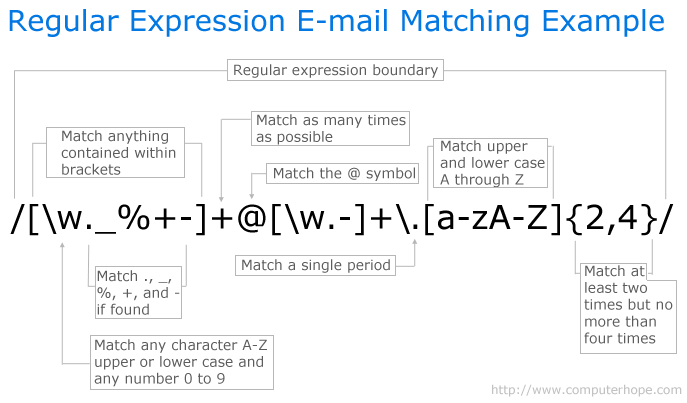

In [ ]:
# Pola telephone : \d penanda angka di reguler Expression, \s spasi, dan "|" adalah "atau"
# "?" menyatakan pilihan (optional): colou?r sesuai dengan colour atau color.

phonePattern = re.compile(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})')
txt = 'Contact kami di 021-7634562 atau 021-763-4562 atau 021 763 4562 atau 0822959020 atau +628199258688'
print(re.sub(phonePattern,'***',txt))# clean phone
    
noTelp = re.findall(phonePattern,txt)
print('Nomer telephone yang ditemukan: ',str(noTelp))

In [ ]:
# Pola telephone 2: untuk setiap angka 8-14 digits dipisahkan oleh "spasi", "," atau "."
phonePattern = re.compile(r'\b\d{8,14}\b')
txt = 'Contact kami di 082295203040 atau +6282295203040'
print(re.sub(phonePattern,'***',txt))# clean phone
    
noTelp = re.findall(phonePattern,txt)

for no in noTelp:
    if no[0]!='0':
        print('+' + no)
    else:
        print(no)
#print('Nomer telephone yang ditemukan: ',str(noTelp))

In [ ]:
# Website URLS http(s) .... untuk ftp trivial
urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

txt = 'website reguler expression & my site : https://www.regular-expressions.info/ & https://tau-data.id'
print(re.sub(urlPattern,' ',txt))# clean urls

URLs = re.findall(urlPattern,txt)# get URLs
print('URL yang ditemukan: ',str(URLs))

website reguler expression & my site :   &  
URL yang ditemukan:  ['https://www.regular-expressions.info/', 'https://tau-data.id']


In [ ]:
# cleaning non alpha-numeric
txt = 'Hi! @Mukidi, apa kabar? #sapa_Pagi.'
print(re.sub(r'[^\w]',' ',txt))
# atau jika ingin exclude titik dan koma 
# re.sub(r'[^.,a-zA-Z0-9 \n\.]','',txt)

Hi   Mukidi  apa kabar   sapa_Pagi 


In [ ]:
# alternative 2:
print(''.join([t for t in txt if t.isalnum() or t==' ' or t=='_']))
# ada perbedaan?

Hi Mukidi apa kabar sapa_Pagi


In [ ]:
# Cleaning hashTags dalam posting media sosial
tweet = 'oh IoT, #AndaiSajaIaTahu #ApaYangAkuRasah... #AlayersTweet #d2d'

getHashtags = re.compile(r"#(\w+)")
print("Tags = {0}".format(re.findall(getHashtags, tweet)))
# temukan hanya tags ... perhatikan IoT bukan Tags walau ada huruf besar & kecil dalam satu kata

Tags = ['AndaiSajaIaTahu', 'ApaYangAkuRasah', 'AlayersTweet', 'd2d']


In [ ]:
pisahtags = re.compile(r'[A-Z][^A-Z]*')

for tags in re.findall(getHashtags, tweet):
    print(re.findall(pisahtags, tags))

In [ ]:
# Mengganti hashtags dengan kata dasar pembentuknya
tweet = 'oh IoT, #AndaiSajaIaTahu #ApaYangAkuRasah... #AlayersTweet'
tagS = re.findall(getHashtags, tweet)
for tag in tagS:
    proper_words = ' '.join(re.findall(pisahtags, tag))
    tweet = tweet.replace('#'+tag,proper_words)

print(tweet)

oh IoT, Andai Saja Ia Tahu Apa Yang Aku Rasah... Alayers Tweet


In [ ]:
s = 'The25XYZ3abc'
re.split('(\d+)',s)

# Encoding-Decoding:
Hal berikutnya yang perlu diperhatikan dalam memproses data teks adalah encoding-decoding.
Contoh Encoding: ASCII, utf, latin, dsb.
saya membahas lebih jauh tetang encoding disini: 
https://tau-data.id/memahami-string-python/
Berikut adalah sebuah contoh sederhana tantangan proses encoding-decoding ketika kita hendak memproses data yang berasal dari internet atau media sosial.

In [ ]:
# kita bisa menggunakan modul unidecode untuk mendapatkan representasi ASCII terdekat
from unidecode import unidecode

T = "ḊḕḀṙ ₲ØĐ, p̾l̾e̾a̾s̾e ḧḕḶṖ ṁḕ"
print(unidecode(T).lower())
# Bahasa Indonesia dan Inggris secara umum mampu direpresentasikan dalam encoding ASCII: 
# https://en.wikipedia.org/wiki/ASCII

dear god, please help me


In [ ]:
# Kita juga bisa membersihkan posting media sosial/website dengan entitas html menggunakan fungsi "unescape" di modul "html"
from html import unescape

print(unescape('Satu &lt; Tiga&nbsp;&amp; &#169; adalah simbol Copyright'))

# Latihan 1:

Diberikan tweet berikut:

tweet =  "The #OctopiPower is &gt; Sharks! &amp; they're awsm! So happy to see them here http://www.octopusVSshark.com !"

preprocess tweet diatas sehingga didapatkan tweet seperti ini (Gunakan sembarang modul yang mendukung):

tweet= "the octopus power is > shark ! & they are awesome ! so happy to see them here !"

Petunjuk/Hints:
Buat satu atau lebih fungsi untuk memudahkan, misal fungsi fixTags dan cleanText.

fix kata "they're" dan awsm dengan teknik sederhana dictionary fix.

Hati-hati terhadap urutan aksi di preprocessing karena akan mengakibatkan hasil yang berbeda.

Kelak di segmen berikutnya urutan aksi ini akan disebut sebagai "Pipelining".

Code solusi latihan ini dengan dasar fikiran bahwa solusinya nanti akan bisa digunakan untuk sembarang preprocessing.

At this point, jangan hawatirkan dulu scalability/efisiensi.

# Latihan 2:

Bagaimana caranya memfilter kata-kata (token) yang terdiri dari huruf dan angka (misal b29nf, _24x_, dsb)?